<a href="https://colab.research.google.com/github/0DianaHernandez/Simulacion-I/blob/main/Aceptacion_rechazo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Método de aceptación y Rechazo**

Este método consiste primeramente en generar  un valor de la variable aleatoria y en seguida probar que dicho valor simulado proviene de la distribución de probabilidad que se está analizando.

Para este caso, consideraremos una distribución de probabilidad $f(x)$ acotada y con rango finito $(a≤x≤b)$

*procedimiento*

Supongamos que $f$ es la densidad objetivo y $g$ es una densidad auxiliar (fácil de simular y similar a $f$), de forma que existe una constante $c>0$
tal que $f(x)≤c⋅g(x), ∀x∈R$
Recordando que el soporte de $g$ debe contener el de $f$.

1. Generar $U\sim U(0,1)$.
2. Generar $Y\sim g$.
3. Si $U≤F(Y)/c*g(Y)$
   devolver $X=Y$
   en caso contrario volver al paso 1.



In [94]:
#Para este caso haremos simulacion para una distribución beta
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

In [95]:
#Parámetros (α,β)
def Acep_rechazo_Beta(a, b):
    # Función de densidad objetivo Beta(a, b)
    def f(x):
        return beta.pdf(x, a, b)

    # Función de densidad auxiliar g(x), en este caso una uniforme en [0, 1]
    def g(x):
        return 1  # Densidad uniforme en [0, 1]

    # Constante c tal que f(x) <= c * g(x)
    #f(x) esté acotada por arriba por c⋅g(x)
    c = max(f(np.linspace(0, 1, 1000)) / g(np.linspace(0, 1, 1000)))


    while True:
        # Generar Y~g
        Y = np.random.uniform(0, 1)
        # Generar U uniforme en [0, 1]
        U = np.random.uniform(0, 1)
        # Aceptar/rechazar
        if U <= f(Y) / (c * g(Y)):
            return Y



In [126]:
# Definición de la función de densidad acumulativa
def F(x):
    if x < -1:
        return 0
    elif -1 <= x <= 1:
        return (3/4) * (x - x**3/3 + 2/3)
    else:
        return 1

In [116]:
#Generamos n muestras aleatorias
def muestras_aleatorias(n, a, b):
    muestras = np.array([Acep_rechazo_Beta(a, b) for _ in range(n)])
    return muestras


In [117]:
# Parámetros de la distribución Beta
a = 2
b = 4
# Número de muestras a generar
n = 1000

# Generar muestras
muestras= muestras_aleatorias(n, a, b)



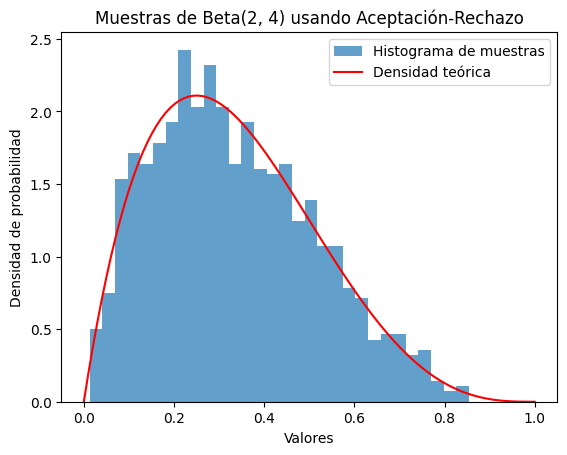

In [118]:
# Histograma de las muestras generadas
plt.hist(muestras, bins=30, density=True, alpha=0.7, label='Histograma de muestras')
x=np.linspace(0, 1, 100)
plt.plot(x, beta.pdf(x,a,b), 'r-', label='Densidad teórica')
plt.title(f'Muestras de Beta({a}, {b}) usando Aceptación-Rechazo')
plt.xlabel('Valores')
plt.ylabel('Densidad de probabilidad')
plt.legend()

plt.show()


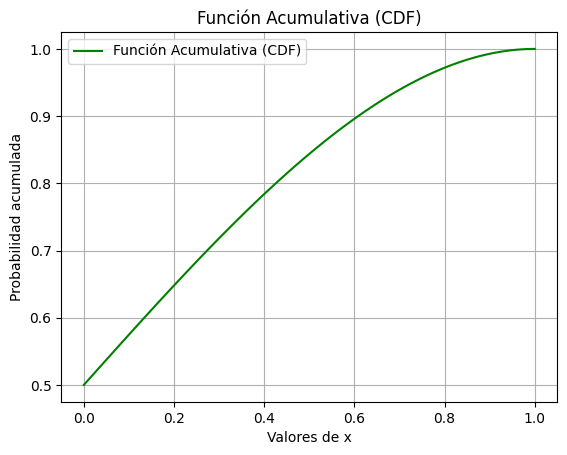

In [127]:
# Cálculo de los valores de la función acumulativa (CDF) para cada valor de x en x_vals
F_vals = np.array([F(x_i) for x_i in x])

# Graficando la función acumulativa (CDF)
plt.plot(x, F_vals, label='Función Acumulativa (CDF)', color='green')
plt.title('Función Acumulativa (CDF)')
plt.xlabel('Valores de x')
plt.ylabel('Probabilidad acumulada')
plt.legend()
plt.grid(True)
plt.show()
